In [ ]:
!date

In [ ]:
!sudo apt update

In [ ]:
!sudo apt install python3-pip

In [ ]:
!sudo pip3 --version

In [ ]:
!sudo pip3 install numpy

In [ ]:
!sudo pip3 install pandas

In [ ]:
!sudo pip3 install matplotlib

In [ ]:
!sudo pip3 install tensorflow


In [1]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [4]:
#data1 = pd.read_csv("/home/rick_selby/SupplyChainDataRev3.csv", skiprows = 0)
data1 = pd.read_csv("/Users/basillatif/Desktop/nfl-big-data-bowl-2020/train.csv", skiprows = 0)

In [3]:
data1.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Class
0,2017090700,2.017090e+13,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
1,2017090700,2.017090e+13,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
2,2017090700,2.017090e+13,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
3,2017090700,2.017090e+13,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
4,2017090700,2.017090e+13,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0


In [5]:
data1.tail()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Class
509757,2018123015,2.018120e+13,home,86.77,24.20,2.14,2.12,0.22,44.55,15.31,...,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE,1
509758,2018123015,2.018120e+13,home,86.76,27.18,1.16,0.66,0.11,53.63,42.80,...,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE,1
509759,2018123015,2.018120e+13,home,87.26,27.05,2.59,1.18,0.26,3.96,21.12,...,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE,1
509760,2018123015,2.018120e+13,home,84.57,24.37,4.36,1.79,0.47,148.08,183.34,...,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE,1
509761,2018123015,2.018120e+13,home,80.80,26.35,4.87,4.10,0.45,135.44,118.24,...,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE,1


In [6]:
data1nparray = data1.values

In [7]:
TrainData   = data1nparray[:, [8, 9, 10]]
TrainLabels = data1nparray[:, [7]]

In [8]:
TrainData

array([[81.99, 177.18, 496723],
       [27.61, 198.7, 2495116],
       [3.01, 202.73, 2495493],
       ...,
       [3.96, 21.12, 2556524],
       [148.08, 183.34, 2557891],
       [135.44, 118.24, 2558865]], dtype=object)

In [9]:
TrainLabels

array([[0.4],
       [0.01],
       [0.31],
       ...,
       [0.26],
       [0.47],
       [0.45]], dtype=object)

In [10]:
TrainLabels=TrainLabels.astype('float32')
TrainData =TrainData.astype('float32')

In [11]:
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [12]:
model.compile(
              optimizer='adam', 
#             optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(TrainData, TrainLabels, epochs=10)

Train on 509762 samples
Epoch 1/10
509762/509762 [==============================] - 28s 54us/sample - loss: nan - accuracy: 0.0050
Epoch 2/10
509762/509762 [==============================] - 27s 52us/sample - loss: nan - accuracy: 0.0051
Epoch 3/10
509762/509762 [==============================] - 26s 51us/sample - loss: nan - accuracy: 0.0051
Epoch 4/10
509762/509762 [==============================] - 26s 52us/sample - loss: nan - accuracy: 0.0051
Epoch 5/10
509762/509762 [==============================] - 26s 50us/sample - loss: nan - accuracy: 0.0051
Epoch 6/10
509762/509762 [==============================] - 28s 55us/sample - loss: nan - accuracy: 0.0051
Epoch 7/10
509762/509762 [==============================] - 29s 56us/sample - loss: nan - accuracy: 0.0051: 0s - loss: nan - accuracy: 0. - ETA: 0s - loss: nan - accuracy: 0.0
Epoch 8/10
509762/509762 [==============================] - 31s 61us/sample - loss: nan - accuracy: 0.0051
Epoch 9/10
509762/509762 [=========================

In [14]:
train_loss, train_acc = model.evaluate(TrainData, TrainLabels)

print('Train accuracy:', train_acc)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Train accuracy: 0.0050611855


In [15]:
predictions = model.predict(TrainData)


In [16]:
class_names = ['Unknown', 'Platinum', 'Gold', 'Silver', 'Tin']


In [17]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


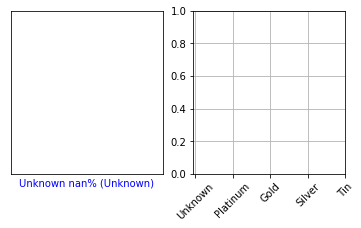

In [18]:
i = 0
TrainLabels = TrainLabels.astype('int32')
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TrainLabels)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TrainLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [19]:
predictions[0]


array([nan, nan, nan, nan, nan], dtype=float32)

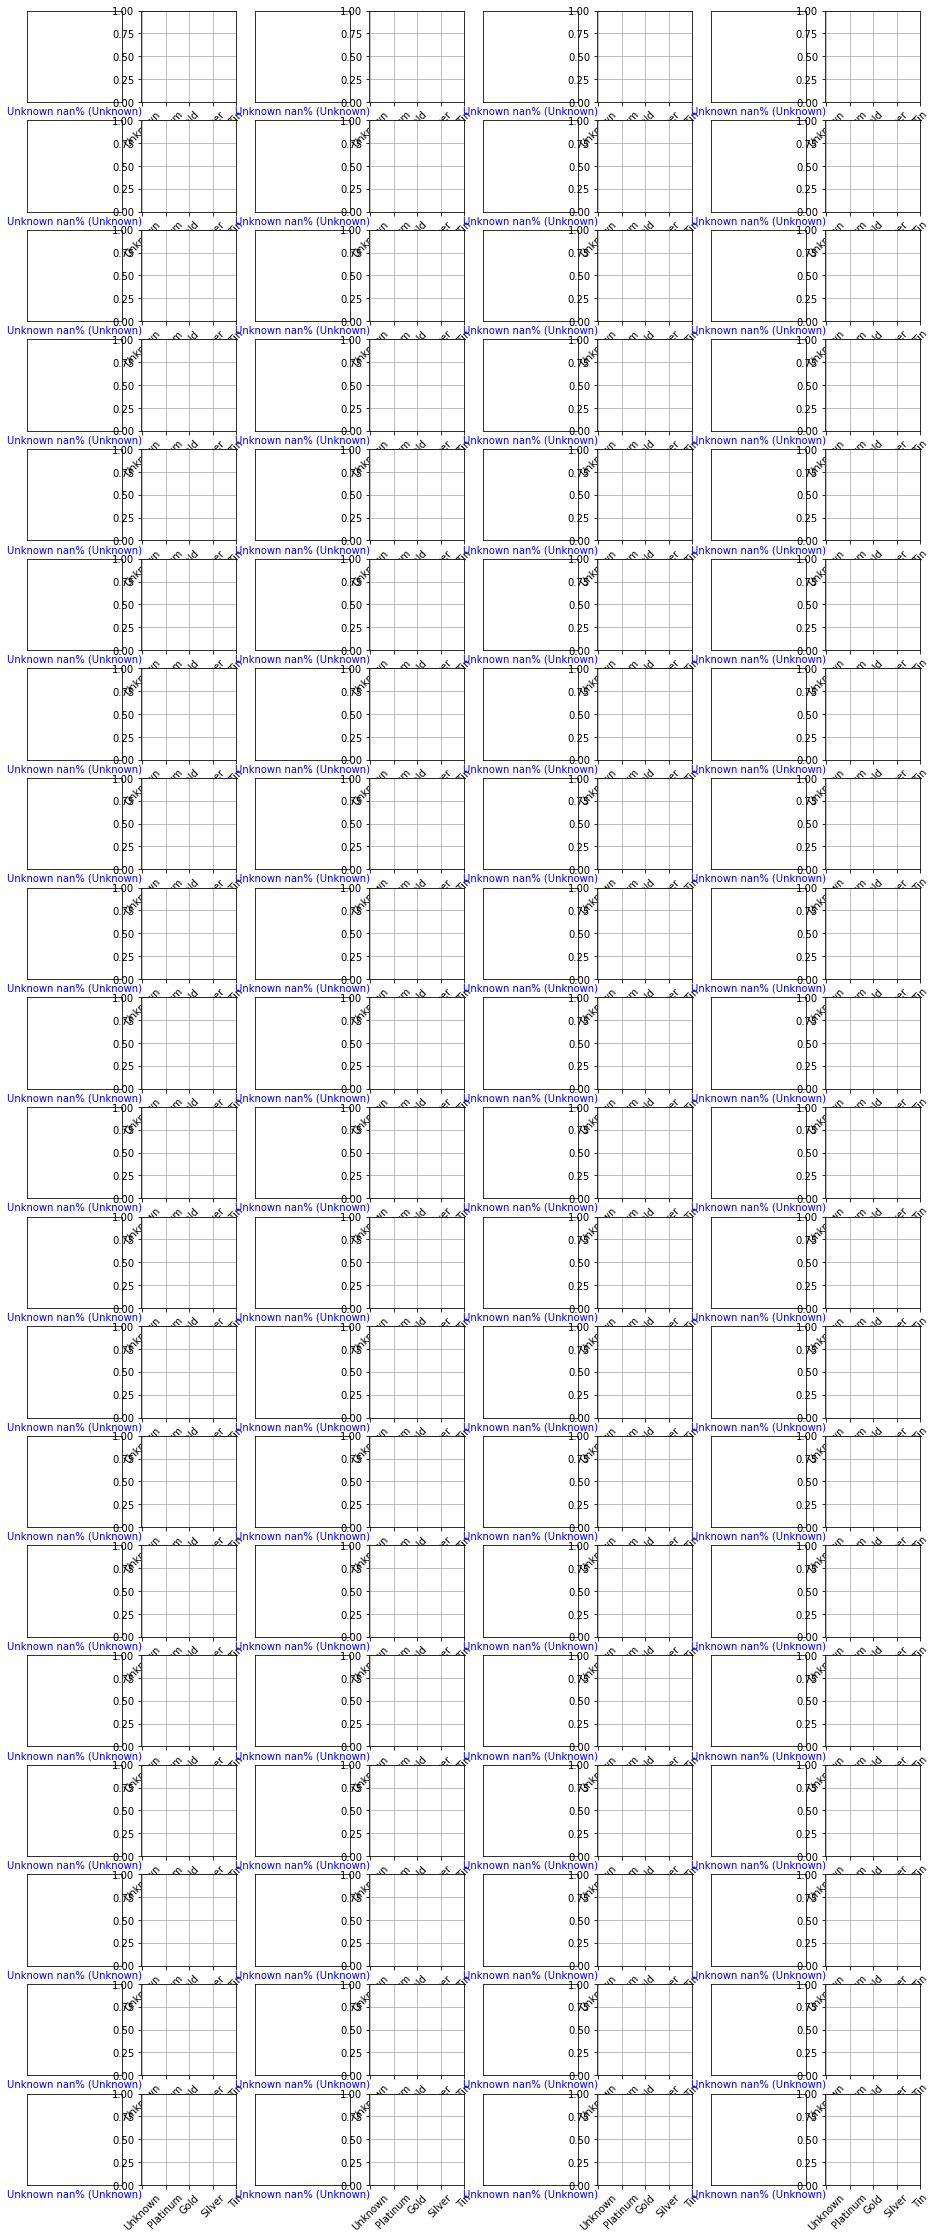

In [20]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, TrainLabels)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, TrainLabels)
  plt.xticks(range(5), class_names, rotation=45)
plt.show()


In [21]:
layer0 = model.get_layer(index=0)


In [22]:
layer0.get_weights()

[array([[nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan], dtype=float32)]

In [23]:
layer1 = model.get_layer(index=1)

In [24]:
layer1.get_weights()

[array([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, nan, nan], dtype=float32)]

In [25]:
#predictionsDF = pd.DataFrame(
#    data=predictions[1:,1:],    # values
#    index=predictions[1:,0],    # 1st column as index
#    columns=predictions[0,1:])  # 1st row as the column names

predictionsDF = pd.DataFrame(
    data=predictions)


In [26]:
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=False, index=False)


In [27]:
PredictedLabels = np.ndarray.copy(TrainLabels)
PredictedOutcomes = np.ndarray.copy(TrainLabels)
for i in range(len(TrainLabels)):
  PredictedLabels[i] = np.argmax(predictions[i])
  if PredictedLabels[i] == TrainLabels[i]:
    PredictedOutcomes[i] = 1
  else:
    PredictedOutcomes[i] = 0


In [ ]:
TrainDataLabels = np.append(TrainData, TrainLabels, axis=1)
TrainDataLabelsPredictions = np.append(TrainDataLabels, PredictedLabels, axis=1)
TrainDataLabelsPredictionsOutcomes = np.append(TrainDataLabelsPredictions, PredictedOutcomes, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)


In [ ]:
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb)

In [ ]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=False, index=False)

In [ ]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SinglePrediction = model.predict(SingleObservation)

In [ ]:
SinglePrediction[0]

In [ ]:
np.max(SinglePrediction[0])

In [ ]:
np.argmax(SinglePrediction[0])

In [ ]:
class_names[np.argmax(SinglePrediction[0])]

In [ ]:
BlankLabels = np.array([[0, 0, 0, 0, 0]])

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, SinglePrediction, BlankLabels)
plt.subplot(1,2,2)
plot_value_array(i, SinglePrediction, BlankLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

In [ ]:
!date